Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000.

### Lecturer notes
It seems that we actually get only `num_words - index_from` most frequent words ... doesn't really matter but might fix this?
Also, it might be useful to use different codes for omitted common words and omitted rare words, now they are coded the same.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

## The IMDB dataset

Keras "IMDB dataset" is a set of 50,000 highly-polarized reviews from the Internet Movie Database.
They are split into 25,000  reviews for training and 25,000 reviews for testing,
each set consisting in 50% negative and 50% positive reviews (so called _sentiment_).

IMDB dataset comes packaged with Keras (about 80Mb).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers),
where each integer stands for a specific word in a dictionary.

For convenience, words are indexed by overall frequency in the dataset,
so that for instance the integer `3` encodes the 3rd most frequent word in the data.
This allows for quick filtering operations such as: 
"only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, `0` does not stand for a specific word, but instead is used to encode any unknown word.

Finally note that words that were not seen in the training set but are in the test set have simply been skipped.

In [ ]:
#loading the IMDB dataset, much like loading the MNIST data

num_words = 10000 # see explanation below
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size. It's also possible to throw away the most commonly used words using parameter `skip_top`, since these won't likely help much in telling documents apart.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

Let's take a look at the complete loading API:
```
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3)
```
### Return values
- `x_train`, `x_test`: list of sequences, which are lists of indexes (integers). 
If the `num_words` argument was specified, the maximum possible _index value_ is `num_words-1`.
If the `maxlen` argument was specified, the largest possible _sequence length_ is `maxlen`.
- `y_train`, `y_test`: list of integer labels (1 or 0).

### Arguments
- `path`: if you do not have the data locally (at `~/.keras/datasets/ + path`), it will be downloaded to this location.
- `num_words`: int or `None`. Top most frequent words to consider. Any less frequent word will appear as `oov_char` value in the sequence data.
- `skip_top`: int. Top most frequent words to ignore (they will appear as `oov_char` value in the sequence data).
- `maxlen`: int. Maximum sequence length. Any longer sequence will be truncated.
- `seed`: int. Seed for reproducible data shuffling (seed of the random number generator).
- `start_char`: int. The _start of a sequence_ will be marked with this character. Set to 1 because 0 is usually the padding character.
- `oov_char`: int. Words that were cut out because of the `num_words` or `skip_top` limit will be replaced with this character.
- `index_from`: int. Index actual words with this index and higher.

In [ ]:
# What does it look like?
print('Training data shape: ', train_data.shape)
print('Test data shape:     ', test_data.shape)
print('Example data train[0]\n', train_data[0])
print('Length of train[0]: ', len(train_data[0]))
print('Label of train[0]:  ', train_labels[0])

Training data shape:  (25000,)
Test data shape:      (25000,)
Example data train[0]
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15

In [ ]:
print('Maximum word index:    ', max([max(sequence) for sequence in train_data]))
print('Maximum review length: ', max([len(sequence) for sequence in train_data]))

Maximum word index:     9999
Maximum review length:  2494


Let's see if we can decode these reviews back to English words.
The Keras `imdb` package provides routine `get_word_index()`, which retrieves a dictionary mapping word indices back to words.

### Lecturer notes

It's kind of funny that the [Keras documentation](https://keras.io/datasets/) makes no mention of this word index routine, yet it is used in the textbook. There is a similar briefly documented routine for another dataset (Reuters), though.
The dictionary (`.json` file) is loaded (in the same directory as the data) from the net first time you call the routine.

In [ ]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


We have a dictionary mapping words to an integer index, but we need a dictionary that maps integer indices to words.
The inverse dictionary can be built simply by swapping the keys and values in the original dictionary.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

### Notes about routine `decode_data` below
- When decoding the review, there's a minor technicality that all indices in training and test data are offset by 3 (`index_from`). This is because numbers 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown/cut out".
- Python dictionary operation `dict.get(key, default = None)` is given a default value (`?`) to return if the given key (`i - idx_from`) is not in the dictionary.
- Python `join()` (for strings) returns a string in which the string elements of a sequence have been joined by the given separator (in our case, blank).

In [ ]:
def decode_label(idx, labels):
    label = labels[idx]
    if label == 0:
        return('Sentiment: negative')
    else:
        return('Sentiment: positive')

def decode_data(idx, coded_data, reverse_index, idx_from=3):
    coded_item = coded_data[idx]
    decoded_item = ' '.join([reverse_index.get(i - idx_from, '?') for i in coded_item])
    return(decoded_item)

Let's see what our data is made of. Feel free to try out other indexes.

In [ ]:
print(decode_data(1, train_data, reverse_word_index, 3), '\n')
print(decode_label(1, train_labels), '\n')
print(decode_data(2, train_data, reverse_word_index, 3), '\n')
print(decode_label(2, train_labels), '\n')

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then 

Sentiment: negative 

? this has to be one of the worst 

## Preparing the data

We have to turn our lists into tensors before feeding them into a network.
There are (at least) two ways we could do that:

### Embedding
- pad lists (with 0s) so that they all have the same length 
- turn the equal-length lists of integers into a tensor of shape `(samples, word_indices)`
- use as the first layer a layer capable of handling such tensors
- the `Embedding` layer (covered in more detail later) is one such layer

### One-hot encoding
- turn word index lists into binary vectors (of size `num_words`, one entry for each word index)
- list `[3, 5]` is transformed to a 10,000-dimensional vector, all zeros except for indices 3 and 5, which would be ones
- Lecturer note: we lose information for repeated words (could store the frequency?)
- use a `Dense` layer as the first layer (as with MNIST data)

We will go with the latter solution --- which is not necessarily the best solution --- but we try to manage with the tools we currently have.

We first "vectorize" our data.

### Lecturer notes
- DLwP tells that our tensors are "integer tensors" while the code below clearly fills them with floating point numbers.
- The assignment statement `bitvectors[i, sequence] = 1.` makes use of _integer array indexing_ (see [Numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) for details) when setting elements of `results` to value `1.` .

In [ ]:
# sequences: list of lists of word indices, max_index = largest index + 1 (= num_words)
def vectorize_sequences(sequences, max_index):
    sample_dim = len(sequences)
    zero_one_vectors = np.zeros((sample_dim, max_index))
    for i, sequence in enumerate(sequences):
        zero_one_vectors[i, sequence] = 1. # note: floating point number
    return zero_one_vectors

We could compute the maximum index of word indices with `max([max(sequence) for sequence in train_data]))` as in the earlier example, but we know it's `num_words` (10000).

In [ ]:
x_train = vectorize_sequences(train_data, num_words)
x_test = vectorize_sequences(test_data, num_words)

Here's what our samples look like now:

In [ ]:
print(x_train.shape)
print(x_train[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


Labels are integer lists, lets make them numpy arrays (of floats).

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter.
A type of network that performs well (?) on such a problem would be
- a simple stack of fully-connected (`Dense`) layers with
- `relu` activations: `Dense(16, activation='relu')`

Having 16 units in a layer means that the weight matrix `W` of the first layer will have shape `(input_dimension, 16)`,
i.e. the dot product with `W` will project the input data onto a 16-dimensional _representation space_
(and then we would add the bias vector `b` and apply the `relu` operation).

You can intuitively understand the dimensionality of your representation space as
"how much freedom you are allowing the network to have when learning internal representations".

Having more units (a higher-dimensional representation space) allows your network to learn more complex representations,
but it makes your network more computationally expensive and may lead to learning unwanted (overfitting) patterns
(patterns that will improve performance on the training data but not on the test data).

### Architectural decisions

Stack of dense layers (decision already made)
- How many layers to use?
- How many units to choose for each layer?
- What activation functions to use in my units?

Later you will (hopefully) learn formal principles to guide you in making these choices. 
For the time being, you will have to trust us: 
- two intermediate layers with 16 hidden units each
- a third layer with 1 unit
- intermediate layers use `relu` as their activation function
- final layer uses a _sigmoid_ activation

Sigmoid as output is a traditional choice for two-class classification tasks.
It outputs a number between 0 and 1, indicating how likely the sample is to have the target "1" (positive). 

Here's what our network looks like:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

And here's the Keras implementation, very similar to the MNIST example you saw previously.

# EXERCICE
Create the model with the Sequential() method.

In [ ]:
model = 

`model.summary()` is quite handy tool to quickly verify your model is as you meant it to be. It also shows you how many parameters the model has (might compare this to your dataset size). The first axis has value `None` since it is the batch axis (and we do not fix the size of minibatches in this phase, only once we compile the model).

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                640064    
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 642,689
Trainable params: 642,689
Non-trainable params: 0
_________________________________________________________________
None


### Loss function and optimizer

We are facing a binary classification problem and the output of our network is a probability.
It is best to use the `binary_crossentropy` loss. 
It isn't the only viable choice: you could use, for instance, `mean_squared_error`.
But crossentropy is usually the best choice when you are dealing with models that output probabilities.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function.
Note that we will also monitor accuracy during training.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and `accuracy` are packaged as part of Keras.

Sometimes you may want to
- configure the parameters of your optimizer, or
- pass a custom loss function or metric function.

The former can be done by passing an optimizer class instance as the `optimizer` argument:

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


The latter can be done by passing function objects as the `loss` or `metrics` arguments:

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [ ]:
val_split = 10000 #nothing to do with the num_words although same value
x_val = x_train[:val_split]
partial_x_train = x_train[val_split:]

y_val = y_train[:val_split]
partial_y_train = y_train[val_split:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors),
in mini-batches of 512 samples.
At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart.
This is done by passing the  validation data as the `validation_data` argument.

### Lecturer notes
Keras may complain something like `UserWarning: Method on_batch_end() is slow compared to the batch update (0.138002). Check your callbacks.` when training the model. This is because the validation set is unnecessarily large (40% of training data) and validation (which is a "callback" mentioned in the warning; callbacks are actions performed after each training epoch) takes hence almost the same time as training over one epoch.

I would --- in general --- use more of the dataset as training data (say 80%) and rest (20%) for validation.
But not in this case since our net tends to overfit quite badly (see below) and the more we train the more it overfits.

It is also usually beneficial to shuffle (permute) the data before splitting it, because the original data may be in some set order.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 1.2195e-06 - accuracy: 1.0000 - val_loss: 1.1571 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 4.2524e-07 - accuracy: 1.0000 - val_loss: 1.2226 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 2.1805e-07 - accuracy: 1.0000 - val_loss: 1.2638 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 1.4166e-07 - accuracy: 1.0000 - val_loss: 1.2947 - val_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 1.0092e-07 - accuracy: 1.0000 - val_loss: 1.3189 - val_accuracy: 0.8729
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 7.7140e-08 - accuracy: 1.0000 - val_loss: 1.3401 - val_accuracy: 0.8729
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 6.1155e-08 - accuracy: 1.0000 - val_loss: 1.3578 - val_ac

Note that the call to `model.fit()` returns a `History` object.
This object has a member `history`, which is a dictionary containing data  about everything that happened during training.
Let's take a look at it:

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


It contains 4 entries: one per each metric that was being monitored, during training and during validation.

Let's use Matplotlib to plot the  training and validation loss side by side, as well as the training and validation accuracy:

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

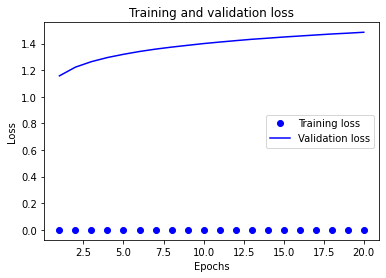

In [ ]:
plt.ion()

epochs = range(1, len(loss) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.ioff()

In [ ]:
# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

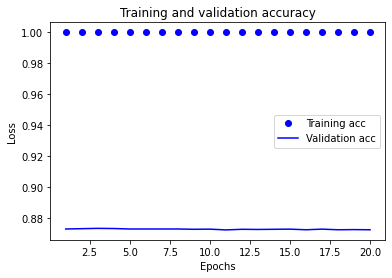

In [ ]:
plt.ion()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.ioff()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy.
Note that your own results may vary slightly due to a different random initialization of your network.

As you can see,
- the training loss decreases with every epoch and
- the training accuracy increases with every epoch.

That's what you would  expect when running gradient descent optimization -- 
the quantity you are trying to minimize should get lower with every iteration.

Validation loss and accuracy seem to peak at the fourth epoch, and they get _worse_ after that:
- a model that performs better on the training data
- isn't necessarily a model that will do better on unseen data.

What you are seeing is _overfitting_: we are over-optimizing on the training data.
We ended up learning representations that
- are specific to the training data and 
- do not generalize to data outside of the training set.

To prevent overfitting, we could simply stop training after three or four epochs.
In general, there is a range of techniques you can leverage to mitigate overfitting, which we will cover later.

Let's see if our results improve by training the network only for four epochs:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4279 - accuracy: 0.8210
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2461 - accuracy: 0.9131
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1918 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3084 - accuracy: 0.8792


In [ ]:
print(results)

[0.3084314167499542, 0.8791999816894531]


Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

### Lecturer's note
State-of-the-art approaches make use of much more sophisticated networks than our simple stacked dense layers.
We'll see them later.

## Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

In [ ]:
p_result = model.predict(x_test)
print(p_result)

[[0.23655128]
 [0.99992955]
 [0.82022125]
 ...
 [0.07724547]
 [0.07965484]
 [0.6013313 ]]


As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 


### Quick and dirty validation (new stuff)

`fit` method has a useful parameter `validation_split`, which takes off the burden of creating our own validation sets (although the split is quite simplistic). From the [Keras documentation](https://keras.io/models/sequential/):

Float between 0 and 1. Fraction of the training data to be used as validation data. The validation data is selected from the last samples in the `x` and `y` data provided, before shuffling.

### Information :
**validation_split** = 	
Flottant entre 0 et 1. Fraction des données d'apprentissage à utiliser comme données de validation. Le modèle mettra à part cette fraction des données d'entraînement, ne s'entraînera pas dessus et évaluera la perte et toute métrique de modèle sur ces données à la fin de chaque époque. Les données de validation sont sélectionnées à partir des derniers échantillons dans les données xet yfournies, avant le brassage. [documentation](https://keras.rstudio.com/reference/fit.html)

In [ ]:
# Reset model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Making use of validation_split parameter, you might try out different values
history = model.fit(x_train,
                    y_train,
                    validation_split=0.3,
                    epochs=20,
                    batch_size=512)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
35/35 [==============================] - 2s 52ms/step - loss: 0.1559 - binary_accuracy: 0.9435 - val_loss: 0.1422 - val_binary_accuracy: 0.9519
Epoch 2/20
35/35 [==============================] - 2s 66ms/step - loss: 0.1221 - binary_accuracy: 0.9583 - val_loss: 0.1563 - val_binary_accuracy: 0.9417
Epoch 3/20
35/35 [==============================] - 1s 39ms/step - loss: 0.1045 - binary_accuracy: 0.9653 - val_loss: 0.1692 - val_binary_accuracy: 0.9349
Epoch 4/20
35/35 [==============================] - 1s 33ms/step - loss: 0.0859 - binary_accuracy: 0.9748 - val_loss: 0.1920 - val_binary_accuracy: 0.9261
Epoch 5/20
35/35 [==============================] - 1s 33ms/step - loss: 0.0719 - binary_accuracy: 0.9787 - val_loss: 0.2189 - val_binary_accuracy: 0.9196
Epoch 6/20
35/35 [==============================] - 1s 34ms/step - loss: 0.0620 - binary_accuracy: 0.9809 - val_loss: 0.2357 - val_binary_accuracy: 0.9152
Epoch 7/20
35/35 [==============================] - 1s 34ms/step - los

In [ ]:
# With more data even more overfit
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.9509 - binary_accuracy: 0.8502
[0.9508930444717407, 0.8502399921417236]


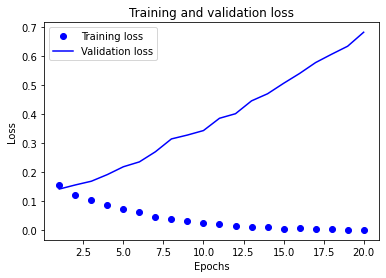

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.ion()

epochs = range(1, len(loss) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.ioff()

# Exercice
Essayez les modifications suivantes.

Entraînez et validez le réseau et rapportez vos résultats en ajoutant les modificaiton suivantes :
 
* Essayez d'utiliser 1 ou 3 couches cachées
* Utilisez la fonction de perte 'mse'.
* Utilisez la fonction d'activation 'tanh' dans les couches cachées. Tester différentes fonctions d'activation et de perte.
* Essayez d'utiliser des couches plus grandes (32, 64, ...).

Pour aller plus loin (facultatif) :
* Supprimez les 20 mots les plus courants (ou tout autre nombre).